In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import pymc3 as pm

C:\Users\claud\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
swiss = pd.read_csv('swiss.csv') 
swiss.head() 

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
#Rename Infant Mortality 
swiss = swiss.rename(columns = {'Infant.Mortality': 'Infant_Mortality'}) 
#Explore the Data - missing value check 
swiss.isnull().any().sum()

0

In [4]:
#Min, Max, Mean, Std for continuous variables
#Remove categorical variable 'Unnamed:0'
swiss = swiss.drop('Unnamed: 0', axis = 1)
for i in swiss.columns:    
    print(i, ': Min-', min(swiss[i]), ', Max-', max(swiss[i]), ', Mean-', np.round(np.mean(swiss[i]),2),', Std-', np.round(np.std(swiss[i]),2))

Fertility : Min- 35.0 , Max- 92.5 , Mean- 70.14 , Std- 12.36
Agriculture : Min- 1.2 , Max- 89.7 , Mean- 50.66 , Std- 22.47
Examination : Min- 3 , Max- 37 , Mean- 16.49 , Std- 7.89
Education : Min- 1 , Max- 53 , Mean- 10.98 , Std- 9.51
Catholic : Min- 2.15 , Max- 100.0 , Mean- 41.14 , Std- 41.26
Infant_Mortality : Min- 10.8 , Max- 26.6 , Mean- 19.94 , Std- 2.88


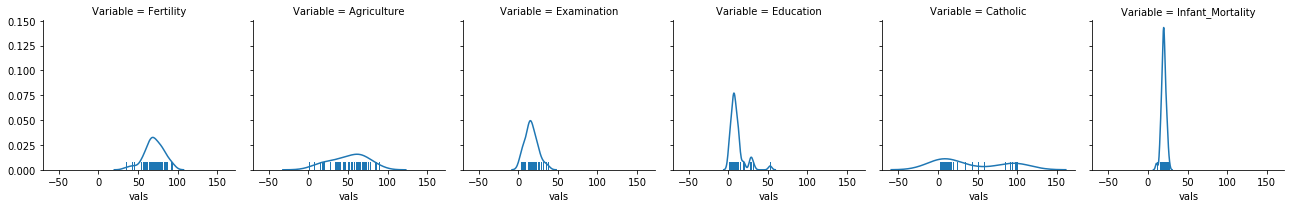

In [5]:
#Distribution of continuous variables 
df = swiss.melt(var_name='Variable', value_name='vals')
g = sns.FacetGrid(df, col='Variable') 
g = (g.map(sns.distplot, "vals", hist=False, rug=True))

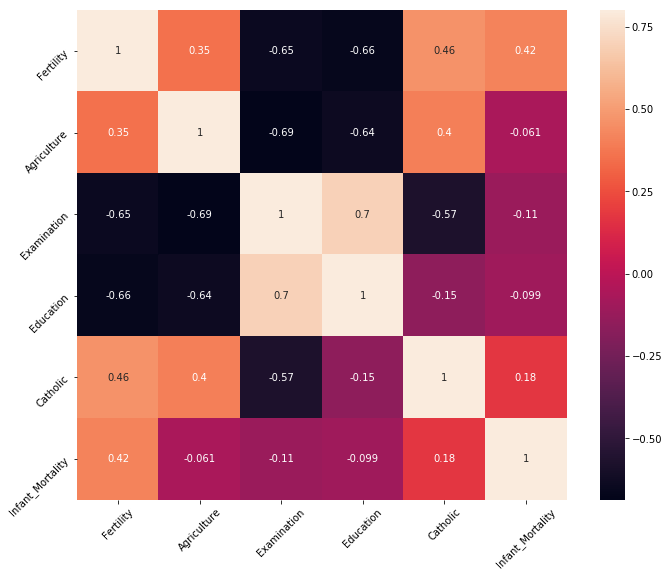

In [6]:
#Correlation Matrix 
corr_mat = swiss.corr() 
fig = plt.figure(figsize=(12,9)) 
sns.heatmap(corr_mat, vmax=0.8, square = True, annot = True) 
plt.xticks(rotation=45) 
plt.yticks(rotation=45) 
plt.show()

In [7]:
#Separate target variable from data 
swiss_target = swiss['Fertility'] 
swiss_data = swiss.drop('Fertility', axis=1) 
#Set target variable as y 
y = swiss_target

In [8]:
#Linear Model
#Split training set 
X1_train, X1_test, y1_train, y1_test = train_test_split(swiss_data, y, test_size = 0.4) 
X2_train, X2_test, y2_train, y2_test = train_test_split(swiss_data, y, test_size = 0.3) 
X3_train, X3_test, y3_train, y3_test = train_test_split(swiss_data, y, test_size = 0.2)

In [9]:
#Function to calculate error
def rmse(Y, Y_pred):    
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))    
    return rmse

In [10]:
lr_model = LinearRegression() 
lr_model.fit(X1_train, y1_train) 
coef1 = pd.DataFrame(lr_model.coef_, X1_train.columns, columns = ['Coefficient']) 
print('LR Model - Intercept: ', lr_model.intercept_.round(2)) 
print(coef1.round(2)) 
y1train_pred = lr_model.predict(X1_train) 
y1test_pred = lr_model.predict(X1_test) 
print('Training RMSE: ', rmse(y1_train, y1train_pred)) 
print('Testing RMSE: ', rmse(y1_test, y1test_pred))

LR Model - Intercept:  67.04
                  Coefficient
Agriculture             -0.10
Examination             -0.14
Education               -0.95
Catholic                 0.11
Infant_Mortality         0.78
Training RMSE:  7.14626369821886
Testing RMSE:  6.785597829467549


In [11]:
'''Interpreting the results for the linear regression model - Agriculture, Examination and Education have a negative impact on the Fertility Rate, whereas Catholic and Infant.Mortality have a positive impact. Infant Mortality could have a positive impact on fertility because if the parents lose a child within the first year they may want still want a child and try again, thereby increasing the rate of fertility. Education may negatively impact the fertility rate due to different priorities''' 

'Interpreting the results for the linear regression model - Agriculture, Examination and Education have a negative impact on the Fertility Rate, whereas Catholic and Infant.Mortality have a positive impact. Infant Mortality could have a positive impact on fertility because if the parents lose a child within the first year they may want still want a child and try again, thereby increasing the rate of fertility. Education may negatively impact the fertility rate due to different priorities'

In [12]:
lr_model2 = LinearRegression() 
lr_model2.fit(X2_train, y2_train) 
coef2 = pd.DataFrame(lr_model2.coef_, X2_train.columns, columns = ['Coefficient']) 
print('LR Model 2- Intercept: ', lr_model2.intercept_.round(2)) 
print(coef2.round(2)) 
y2train_pred = lr_model2.predict(X2_train) 
y2test_pred = lr_model2.predict(X2_test) 
print('Training RMSE: ', rmse(y2_train, y2train_pred)) 
print('Testing RMSE: ', rmse(y2_test, y2test_pred)) 

LR Model 2- Intercept:  66.57
                  Coefficient
Agriculture             -0.12
Examination             -0.21
Education               -0.80
Catholic                 0.09
Infant_Mortality         0.94
Training RMSE:  6.784183287223654
Testing RMSE:  6.81176774756709


In [13]:
lr_model3 = LinearRegression() 
lr_model3.fit(X3_train, y3_train) 
coef3 = pd.DataFrame(lr_model3.coef_, X3_train.columns, columns = ['Coefficient']) 
print('LR Model 3- Intercept: ', lr_model3.intercept_.round(2)) 
print(coef3.round(2)) 
y3train_pred = lr_model3.predict(X3_train) 
y3test_pred = lr_model3.predict(X3_test) 
print('Training RMSE: ', rmse(y3_train, y3train_pred)) 
print('Testing RMSE: ', rmse(y3_test, y3test_pred))

LR Model 3- Intercept:  66.61
                  Coefficient
Agriculture             -0.17
Examination             -0.35
Education               -0.82
Catholic                 0.09
Infant_Mortality         1.16
Training RMSE:  6.445621868165619
Testing RMSE:  7.641842316069078


In [14]:
'''For all three models there is a negative coefficient for Agriculture, Examination, and Education meaning that a unit increase in these three variables leads to a decrease in the Fertility Rate. The training errors for all three vary slightly with model 2 having the lowest. Model 2 has a testing error that is higher than the training error, this could be an indication of overfitting. Model 1 & 3 have testing errors that are less than training errors, overfitting is less of a concern in these cases'''

'For all three models there is a negative coefficient for Agriculture, Examination, and Education meaning that a unit increase in these three variables leads to a decrease in the Fertility Rate. The training errors for all three vary slightly with model 2 having the lowest. Model 2 has a testing error that is higher than the training error, this could be an indication of overfitting. Model 1 & 3 have testing errors that are less than training errors, overfitting is less of a concern in these cases'

In [15]:
#Bayesian Linear Model
#Split data set
X1_train_y = pd.concat([X1_train, y1_train], axis=1) 
X1_test_y = pd.concat([X1_test, y1_test], axis=1) 
X2_train_y = pd.concat([X2_train, y2_train], axis=1) 
X2_test_y = pd.concat([X2_test, y2_test], axis=1) 
X3_train_y = pd.concat([X3_train, y3_train], axis=1) 
X3_test_y = pd.concat([X3_test, y3_test], axis=1)

In [16]:
formula = 'Fertility ~ Agriculture + Examination + Education + Catholic + Infant_Mortality' 
with pm.Model() as linear_model:    
    family = pm.glm.families.Normal()    
    pm.GLM.from_formula(formula, data = X1_train_y, family = family)    
    trace = pm.sample(2000, chains = 2, tune = 500) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Infant_Mortality, Catholic, Education, Examination, Agriculture, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:44<00:00, 112.84draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [17]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,66.97,21.82,0.57,24.72,110.78,1532.75,1.0
Agriculture,-0.09,0.15,0.00,-0.38,0.21,1685.04,1.0
Examination,-0.12,0.43,0.01,-1.01,0.69,1838.85,1.0
Education,-0.95,0.34,0.01,-1.59,-0.28,1538.12,1.0
Catholic,0.12,0.05,0.00,0.01,0.22,1825.85,1.0
Infant_Mortality,0.76,0.75,0.02,-0.73,2.26,1631.75,1.0
sd,8.37,1.30,0.03,6.11,10.99,1697.63,1.0


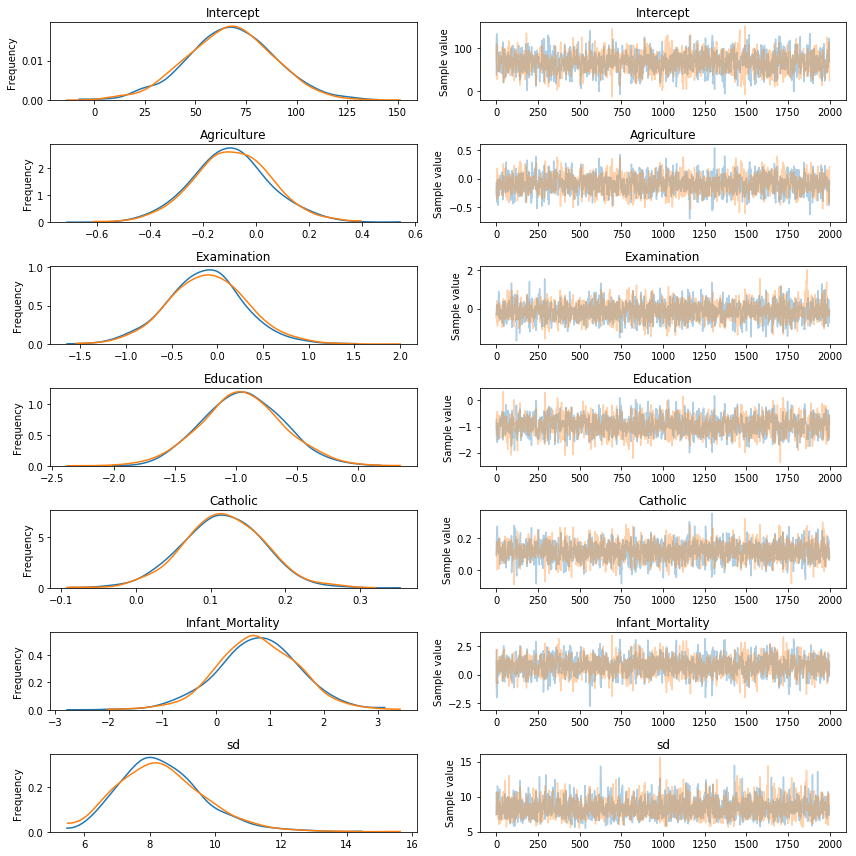

In [18]:
#Posterior distribution 
pm.traceplot(trace, figsize = (12, 12));

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CD646CE80>,
      dtype=object)

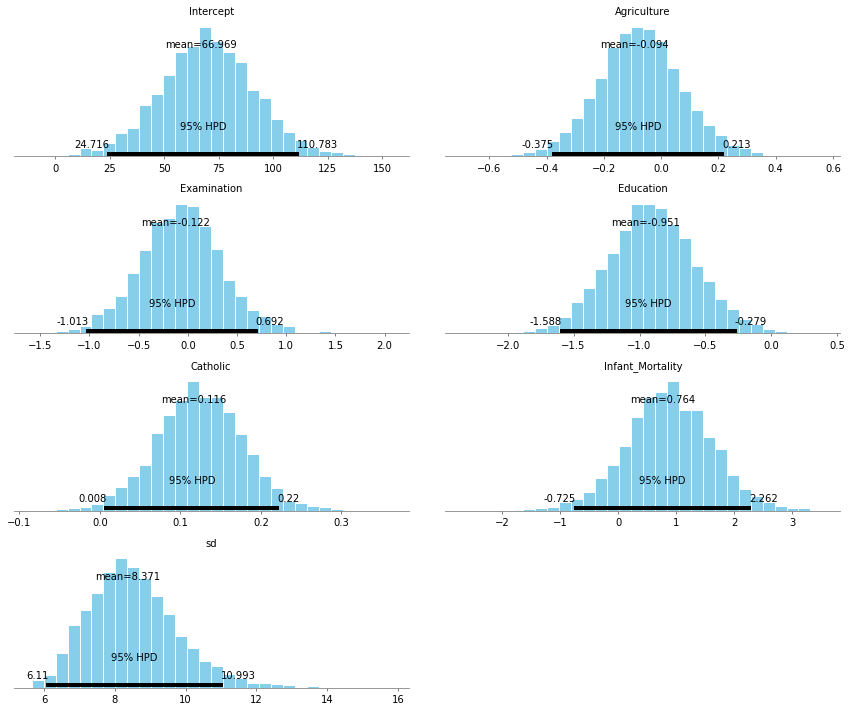

In [19]:
#Posterior distribution - histogram 
pm.plot_posterior(trace)

In [20]:
#Function to make predictions 
def test_model(trace, test_obs):        
    var_dict = {}    
    for variable in trace.varnames:        
        var_dict[variable] = trace[variable]        
    
    #initialize y_pred variable    
    y_pred = 0        
    
    #Results into a dataframe    
    var_weights = pd.DataFrame(var_dict)        
    
    #Standard deviation of the likelihood    
    sd_value = var_weights['sd'].mean() 
   
    #Actual Value    
    actual = test_obs['Fertility']        
    
    #Add in intercept term    
    test_obs['Intercept'] = 1    
    test_obs = test_obs.drop('Fertility')        
    
    #Align weights and test observation    
    var_weights = var_weights[test_obs.index] 
    
    #Means for all the weights    
    var_means = var_weights.mean(axis=0) 

    #Location of mean for observation    
    mean_loc = np.dot(var_means, test_obs)        
    
    #Estimates of grade    
    estimates = np.random.normal(loc = mean_loc, scale = sd_value, size = 1000) 
   
    #Plot all the estimates    
    plt.figure()    
    
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                 kde_kws = {'linewidth' : 4},                
                 label = 'Estimated Dist.')    
    
    #Plot the actual grade    
    plt.vlines(x = actual, ymin = 0, ymax = 5,                
               linestyles = '--', colors = 'red',               
               label = 'True Fertility',              
               linewidth = 2.5)        
    
    #Plot the mean estimate    
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5,                
               linestyles = '-', colors = 'orange',               
               label = 'Mean Estimate',              
               linewidth = 2.5)       
    
    plt.legend(loc = 1)    
    plt.title('Density Plot');
    plt.xlabel('Fertility'); plt.ylabel('Density');        
    
    y_pred = mean_loc    
    
    #Prediction information    
    print('True Grade = %d' % actual)    
    print('Average Estimate = %0.4f' % mean_loc)   
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5), np.percentile(estimates, 95)))    
    
    return y_pred 

In [ ]:
# BLR Model 1 training and test predictions 
b_y1train_pred = [] 
for i in range(len(X1_train_y)):    
    temp = test_model(trace, X1_train_y.iloc[i])     
    b_y1train_pred.append(temp) 

b_y1test_pred = [] 
for i in range(len(X1_test_y)):    
    temp = test_model(trace, X1_test_y.iloc[i])     
    b_y1test_pred.append(temp) 

In [22]:
#BLR Model 2 with 70:30 split 
with pm.Model() as linear_model:    
    family = pm.glm.families.Normal()    
    pm.GLM.from_formula(formula, data = X2_train_y, family = family)    
    trace2 = pm.sample(2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Infant_Mortality, Catholic, Education, Examination, Agriculture, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:34<00:00, 143.09draws/s]
The acceptance probability does not match the target. It is 0.8869144839249322, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8947411909506129, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
# BLR Model 2 training and test predictions 
b_y2train_pred = [] 
for i in range(len(X2_train_y)):    
    temp = test_model(trace2, X2_train_y.iloc[i])     
    b_y2train_pred.append(temp) 
    
b_y2test_pred = [] 
for i in range(len(X2_test_y)):    
    temp = test_model(trace2, X2_test_y.iloc[i])     
    b_y2test_pred.append(temp) 

In [24]:
#BLR Model 3 with 80:20 split 
with pm.Model() as linear_model:    
    family = pm.glm.families.Normal()    
    pm.GLM.from_formula(formula, data = X3_train_y, family = family)    
    trace3 = pm.sample(2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Infant_Mortality, Catholic, Education, Examination, Agriculture, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:35<00:00, 138.97draws/s]


In [ ]:
#BLR Model 3 training and test predictions 
b_y3train_pred = [] 
for i in range(len(X3_train_y)):    
    temp = test_model(trace3, X3_train_y.iloc[i])     
    b_y3train_pred.append(temp) 
    
b_y3test_pred = [] 
for i in range(len(X3_test_y)):    
    temp = test_model(trace3, X3_test_y.iloc[i])     
    b_y3test_pred.append(temp)

In [26]:
print('BLR Model 1 - 60:40') 
print(pm.summary(trace)['mean'].round(2)) 
print('Training RMSE: ', rmse(y1_train, b_y1train_pred)) 
print('Testing RMSE: ', rmse(y1_test, b_y1test_pred))

BLR Model 1 - 60:40
Intercept           66.97
Agriculture         -0.09
Examination         -0.12
Education           -0.95
Catholic             0.12
Infant_Mortality     0.76
sd                   8.37
Name: mean, dtype: float64
Training RMSE:  7.146851045061766
Testing RMSE:  6.801389414732747


In [27]:
print('BLR Model 2 - 70:30') 
print(pm.summary(trace2)['mean'].round(2)) 
print('Training RMSE: ', rmse(y2_train, b_y2train_pred)) 
print('Testing RMSE: ', rmse(y2_test, b_y2test_pred))

BLR Model 2 - 70:30
Intercept           66.75
Agriculture         -0.13
Examination         -0.21
Education           -0.81
Catholic             0.10
Infant_Mortality     0.94
sd                   7.75
Name: mean, dtype: float64
Training RMSE:  6.78444454537298
Testing RMSE:  6.7888497675668535


In [28]:
print('BLR Model 3 - 80:20') 
print(pm.summary(trace3)['mean'].round(2)) 
print('Training RMSE: ', rmse(y3_train, b_y3train_pred)) 
print('Testing RMSE: ', rmse(y3_test, b_y3test_pred))

BLR Model 3 - 80:20
Intercept           66.89
Agriculture         -0.17
Examination         -0.36
Education           -0.82
Catholic             0.09
Infant_Mortality     1.16
sd                   7.26
Name: mean, dtype: float64
Training RMSE:  6.445950159742635
Testing RMSE:  7.643650526213025


In [29]:
'''The mean coefficients for all three models are similar to the coefficients of the linear models with similar training and test errors. For Model 3 of the Bayesian Linear method we can interpret that Agriculture, Examination and Education have a negative weight with Education having the largest impact. Catholic and Infant Mortality have a positive weight with Infanty Mortality having a more positive impact''' 

'The mean coefficients for all three models are similar to the coefficients of the linear models with similar training and test errors. For Model 3 of the Bayesian Linear method we can interpret that Agriculture, Examination and Education have a negative weight with Education having the largest impact. Catholic and Infant Mortality have a positive weight with Infanty Mortality having a more positive impact'